<a href="https://colab.research.google.com/github/rallyfranky/my-first-repo/blob/main/%E6%A9%9F%E4%BC%9A%E5%AD%A6%E7%BF%92%E8%A8%93%E7%B7%B44%E7%AB%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)
df_wine.columns = ['Class label','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocuanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']

print('Class label',np.unique(df_wine['Class label']))

df_wine.head()

Class label [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocuanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:,1:].values,df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0,stratify=y)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.fit_transform(X_test)

In [ ]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', multi_class='ovr')
lr.fit(X_train_std, y_train)
print('trainning accuracy is ',lr.score(X_train_std, y_train))
print('test accuracy is ',lr.score(X_test_std, y_test))

trainning accuracy is  1.0
test accuracy is  1.0


In [ ]:
lr.intercept_

array([-1.26297813, -1.21580434, -2.369942  ])

In [ ]:
lr.coef_#3クラスの分類なので、3つの偏相関係数の重みがアウトプットされる。

array([[ 1.2460616 ,  0.18060661,  0.74196929, -1.1600531 ,  0.        ,
         0.        ,  1.17508237,  0.        ,  0.        ,  0.        ,
         0.        ,  0.54289025,  2.5112079 ],
       [-1.53677667, -0.38746169, -0.99504895,  0.36509605, -0.05981912,
         0.        ,  0.66832374,  0.        ,  0.        , -1.9342679 ,
         1.23326625,  0.        , -2.23221345],
       [ 0.13466276,  0.16988829,  0.3577314 ,  0.        ,  0.        ,
         0.        , -2.43260644,  0.        ,  0.        ,  1.56300373,
        -0.81694689, -0.49756714,  0.        ]])

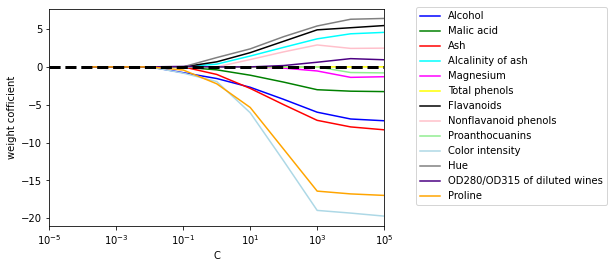

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)
#各係数の色味を作成
colors = ['blue','green','red','cyan','magenta','yellow','black',
          'pink','lightgreen','lightblue','gray','indigo','orange']

weights, params=[],[]

for c in np.arange(-4.,6.):
  lr = LogisticRegression(penalty='l1',C=10.**c, solver='liblinear', multi_class='ovr',random_state=1)
  lr.fit(X_train_std, y_train)
  weights.append(lr.coef_[1])
  params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]),colors):
  plt.plot(params,weights[:,column],label=df_wine.columns[column+1],color=color)

plt.axhline(0, color='black', linestyle='--',linewidth=3)
plt.xlim([10**(-5),10**5])
plt.ylabel('weight cofficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend()
ax.legend(loc='upper center',bbox_to_anchor=(1.38,1.03),ncol=1,fancybox=True)
plt.show()

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocuanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


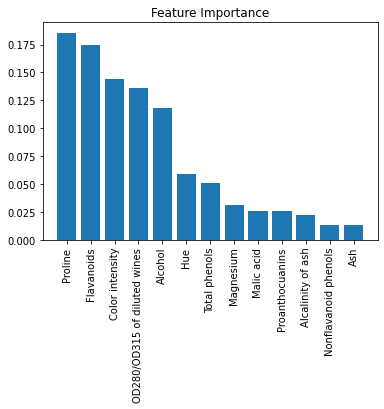

In [ ]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, y_train)
importance = forest.feature_importances_

indices = np.argsort(importance)[::-1]

for f in range(X_train.shape[1]):
  print("%2d) %-*s %f" %
        (f+1, 30, feat_labels[indices[f]],importance[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),importance[indices],align='center')
plt.xticks(range(X_train.shape[1]),feat_labels[indices],rotation=90)
plt.xlim([-1,X_train.shape[1]])
plt.show()

In [ ]:
print(importance)


[0.11852942 0.02564836 0.01327854 0.02236594 0.03135708 0.05087243
 0.17475098 0.01335393 0.02556988 0.1439199  0.058739   0.13616194
 0.1854526 ]


Text(0.5, 1.0, 'feature_importance')

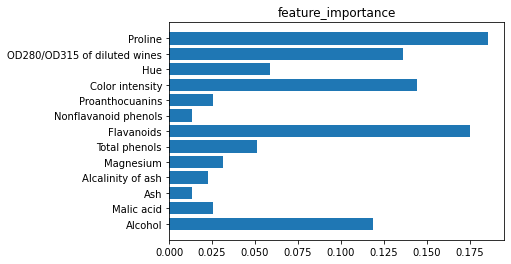

In [ ]:
plt.barh(feat_labels, importance)
plt.title('feature_importance')